In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as spsig
import scipy.special as spsp

In [2]:
from gnuradio import gr
import gnuradio.analog as gr_analog
import gnuradio.filter as gr_filter

In [3]:
# Some parameters common to all
sps = 4
bt = .5
L = 6
num_taps = L * sps



24
24


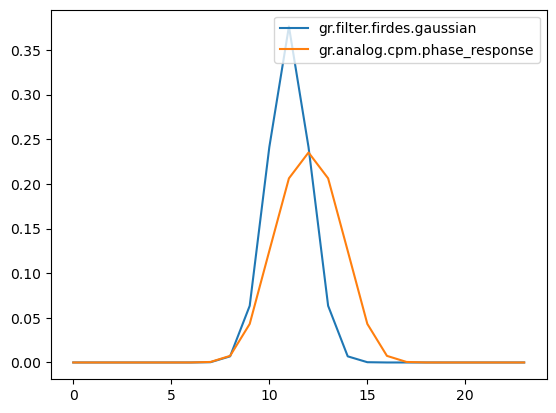

In [4]:
gr_filter_taps = gr_filter.firdes.gaussian(1, sps, bt, num_taps)
gr_analog_taps = gr_analog.cpm.phase_response(gr_analog.cpm.GAUSSIAN, sps, L, bt)

print(len(gr_filter_taps))
print(len(gr_analog_taps))

plt.figure()
plt.plot(gr_filter_taps)
plt.plot(gr_analog_taps)
plt.legend(["gr.filter.firdes.gaussian", "gr.analog.cpm.phase_response"])


In [5]:
def analog_equiv(sps, L, bt):
    # Use the erf based formulation
    # This is 1:1 equivalent to the gr-analog implementation
    n = np.arange(L*sps) - L*sps/2
    t = n/sps
    alpha = np.sqrt(2/np.log(2)) * np.pi * bt
    taps = (spsp.erf(alpha * (t + 0.5)) - spsp.erf(alpha * (t - 0.5))) * 0.5 / sps
    return taps/np.sum(taps)

def filter_equiv(sps, bt, num_taps):
    n = np.arange(num_taps) - num_taps/2 + 1
    t = n/sps # equivalent to dt * t0
    s = 1.0/(np.sqrt(np.log(2.0)) / (2*np.pi*bt))
    ts = t * s
    taps = np.exp(-0.5 * ts**2)
    return taps/np.sum(taps)


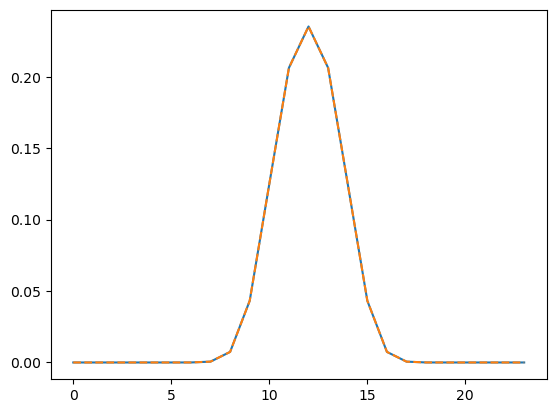

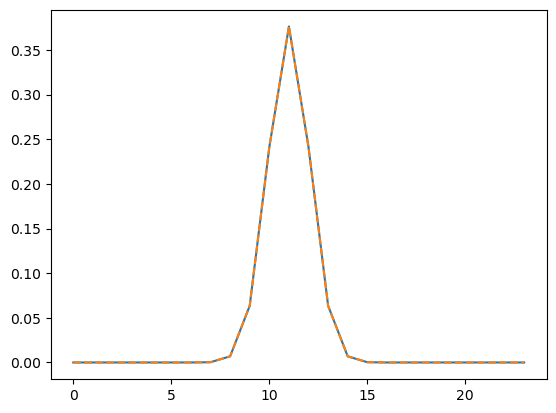

In [6]:
# Show our python equivalents are actually matching the gnuradio implementations
erf_taps = analog_equiv(sps, L, bt)
plt.figure()
plt.plot(gr_analog_taps)
plt.plot(erf_taps, '--')


exp_taps = filter_equiv(sps, bt, num_taps)
plt.figure()
plt.plot(gr_filter_taps)
plt.plot(exp_taps, '--')